# Protein Exploration Notebook

In [1]:
#Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load Datasets

In [2]:
#Load Datasets

protein_df = pd.read_csv('../data/raw/ProteinAndPathologyQuantifications.csv')
Donor_df = pd.read_csv('../data/raw/DonorInformation.csv')
Stains_df = pd.read_csv('../data/raw/DescriptionOfStains.csv')
gene_expression_df = pd.read_csv('../data/raw/gene_expression_matrix_2016-03-03/fpkm_table_normalized.csv')
gene_expression_unnormalized_df = pd.read_csv('../data/raw/gene_expression_matrix_2016-03-03/fpkm_table_unnormalized.csv')
columns_samples_df = pd.read_csv('../data/raw/gene_expression_matrix_2016-03-03/columns-samples.csv')
rows_genes_df = pd.read_csv('../data/raw/gene_expression_matrix_2016-03-03/rows-genes.csv')


In [3]:
columns_samples_df



,rnaseq_profile_id,donor_id,donor_name,specimen_id,specimen_name,rna_well_id,polygon_id,structure_id,structure_acronym,structure_color,structure_name,hemisphere
0,488395315,309335467,H14.09.030,309357843,H14.09.030.TCx.01,395325172,320817998,10235,TCx,#ebbfd0,temporal neocortex,left
1,496100277,309335441,H14.09.004,309357624,H14.09.004.PCx.01,320630866,310967169,10557,FWM,#f2f1f0,white matter of forebrain,right
2,496100278,309335438,H14.09.001,309357596,H14.09.001.PCx.01,320630834,310790571,10557,FWM,#f2f1f0,white matter of forebrain,left
3,496100279,309335438,H14.09.001,309357599,H14.09.001.TCx.01,320630838,310790522,10235,TCx,#ebbfd0,temporal neocortex,left
4,496100281,309335439,H14.09.002,309357603,H14.09.002.HIP.01,320630842,310790372,10294,HIP,#bfb5d5,hippocampus (hippocampal formation),right
...,...,...,...,...,...,...,...,...,...,...,...,...
372,496100667,467056391,H15.09.103,467179071,H15.09.103.TCx.01,482655826,480366830,10235,TCx,#ebbfd0,temporal neocortex,right
373,496100669,467056391,H15.09.103,467179068,H15.09.103.PCx.01,482655822,480363830,10557,FWM,#f2f1f0,white matter of forebrain,right
374,496100670,467056406,H15.09.107,467179104,H15.09.107.TCx.01,482655780,480363840,10235,TCx,#ebbfd0,temporal neocortex,right
375,496100671,467056391,H15.09.103,467179065,H15.09.103.HIP.01,482655820,480366825,10294,HIP,#bfb5d5,hippocampus (hippocampal formation),right


In [4]:
donor_labels_df = Donor_df[['donor_id','act_demented']]

In [5]:
protein_df
protein_gene_df = protein_df

In [6]:
# join APP and MAPT genes to dataframe


In [7]:
def get_gene_data(gene_name, rows_genes_df, gene_expression_df):
    gene_id = rows_genes_df[rows_genes_df['gene_symbol']==gene_name]['gene_id']
    gene_data = gene_expression_df[gene_expression_df['gene_id \ rnaseq_profile_id']==gene_id.iloc[0]].drop(columns='gene_id \ rnaseq_profile_id')
    return gene_data
    

In [8]:
gene_name = 'APP'
APP_data = get_gene_data(gene_name, rows_genes_df, gene_expression_df)


In [9]:
protein_gene_df['APP_gene'] = np.array(APP_data.T)


In [10]:
gene_name = 'MAPT'
MAPT_data = get_gene_data(gene_name, rows_genes_df, gene_expression_df)


In [11]:
protein_gene_df['MAPT_gene'] = np.array(MAPT_data.T)


In [12]:
protein_gene_df



,donor_id,donor_name,structure_id,structure_acronym,ihc_a_syn,ihc_tau2_ffpe,ihc_at8_ffpe,ihc_at8,ihc_ptdp_43_ffpe,ihc_a_beta_ffpe,...,ab40_pg_per_mg,a_syn_pg_per_mg,ifn_g_pg_per_mg,mcp_1_pg_per_mg,bdnf_pg_per_mg,mip_1a_pg_per_mg,il_7_pg_per_mg,ab42_pg_per_mg,APP_gene,MAPT_gene
0,309335467,H14.09.030,10557,FWM,0.000078,0.002358,0.001137,0.000110,0.001259,0.008335,...,0.736100,0.122288,1.47,20.78,5.03736,9.38,11.78,523.292251,247.679736,55.130226
1,309335480,H14.09.043,10208,PCx,0.000063,0.002762,0.001272,0.000164,0.002354,0.005047,...,0.669094,0.111962,1.44,40.40,4.95462,8.10,45.02,81.493875,192.360029,36.748958
2,309335493,H14.09.056,10557,FWM,0.000064,0.003468,0.013787,0.016023,0.001708,0.007365,...,0.736100,0.091084,0.54,46.88,5.88409,27.00,15.82,470.734514,238.673113,42.039427
3,326765668,H14.09.081,10557,FWM,0.000049,0.003035,0.001707,0.000137,0.001729,0.004046,...,8.995575,0.054076,0.76,10.34,16.13524,8.06,24.22,568.368571,280.914264,61.667356
4,326765668,H14.09.081,10235,TCx,0.000080,0.002088,0.004489,0.000062,0.001513,0.015809,...,95.931000,0.030000,1.22,21.38,0.03000,10.52,23.72,438.863263,261.085630,59.408910
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
372,326765653,H14.09.066,10208,PCx,0.000046,0.001989,0.000533,0.000082,0.001130,0.003128,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,280.827034,64.625891
373,309335452,H14.09.015,10294,HIP,0.000089,0.001918,0.004685,0.000923,0.001181,0.003483,...,0.574500,0.248816,0.00,7.16,2.94819,17.82,1.38,0.054413,291.108830,58.141652
374,309335489,H14.09.052,10294,HIP,0.000066,0.002275,0.006337,0.009560,0.001395,0.001710,...,0.900050,0.183510,0.00,3.14,10.56419,21.96,0.60,0.181375,245.876041,51.324605
375,309335458,H14.09.021,10208,PCx,0.000793,0.004384,0.001266,0.000093,0.002505,0.009795,...,0.444250,0.045202,0.00,7.20,2.83064,0.00,12.46,205.886650,196.195283,61.005087


In [13]:
#set list of donor ids

donor_ids = protein_gene_df.donor_id.unique()

In [14]:
# Map donor_labels_df to protein_df so each sample will be associated with the appropriate diagnosis 
donor_labels_dict = donor_labels_df.set_index('donor_id')['act_demented'].to_dict()
protein_gene_df['dementia_status'] = protein_gene_df['donor_id'].map(donor_labels_dict)

In [15]:
#Examine protein_df to ensure labels properly populated
protein_gene_df

,donor_id,donor_name,structure_id,structure_acronym,ihc_a_syn,ihc_tau2_ffpe,ihc_at8_ffpe,ihc_at8,ihc_ptdp_43_ffpe,ihc_a_beta_ffpe,...,a_syn_pg_per_mg,ifn_g_pg_per_mg,mcp_1_pg_per_mg,bdnf_pg_per_mg,mip_1a_pg_per_mg,il_7_pg_per_mg,ab42_pg_per_mg,APP_gene,MAPT_gene,dementia_status
0,309335467,H14.09.030,10557,FWM,0.000078,0.002358,0.001137,0.000110,0.001259,0.008335,...,0.122288,1.47,20.78,5.03736,9.38,11.78,523.292251,247.679736,55.130226,No Dementia
1,309335480,H14.09.043,10208,PCx,0.000063,0.002762,0.001272,0.000164,0.002354,0.005047,...,0.111962,1.44,40.40,4.95462,8.10,45.02,81.493875,192.360029,36.748958,Dementia
2,309335493,H14.09.056,10557,FWM,0.000064,0.003468,0.013787,0.016023,0.001708,0.007365,...,0.091084,0.54,46.88,5.88409,27.00,15.82,470.734514,238.673113,42.039427,Dementia
3,326765668,H14.09.081,10557,FWM,0.000049,0.003035,0.001707,0.000137,0.001729,0.004046,...,0.054076,0.76,10.34,16.13524,8.06,24.22,568.368571,280.914264,61.667356,No Dementia
4,326765668,H14.09.081,10235,TCx,0.000080,0.002088,0.004489,0.000062,0.001513,0.015809,...,0.030000,1.22,21.38,0.03000,10.52,23.72,438.863263,261.085630,59.408910,No Dementia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
372,326765653,H14.09.066,10208,PCx,0.000046,0.001989,0.000533,0.000082,0.001130,0.003128,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,280.827034,64.625891,Dementia
373,309335452,H14.09.015,10294,HIP,0.000089,0.001918,0.004685,0.000923,0.001181,0.003483,...,0.248816,0.00,7.16,2.94819,17.82,1.38,0.054413,291.108830,58.141652,No Dementia
374,309335489,H14.09.052,10294,HIP,0.000066,0.002275,0.006337,0.009560,0.001395,0.001710,...,0.183510,0.00,3.14,10.56419,21.96,0.60,0.181375,245.876041,51.324605,No Dementia
375,309335458,H14.09.021,10208,PCx,0.000793,0.004384,0.001266,0.000093,0.002505,0.009795,...,0.045202,0.00,7.20,2.83064,0.00,12.46,205.886650,196.195283,61.005087,Dementia


In [16]:
#Check the distribution of Dementia in Protein samples dataset
print('No Dementia: ', len(protein_gene_df[protein_gene_df['dementia_status']=='No Dementia']))
print('Dementia: ', len(protein_gene_df[protein_gene_df['dementia_status']=='Dementia']))

No Dementia:  197
Dementia:  180


# Handling Missing Data

In [17]:
#check for Nan
total_nan_count = protein_gene_df.isna().sum()


In [18]:
#total_nan_count

In [19]:
# Process dataframe by Dropping Nan
# - drop isoprostane_pg_per_mg because missing most of the data (63% of samples missing isoprostane data)
# - dropna for remaining columns (will still represent >70% of the samples)

protein_gene_df = protein_gene_df.drop('isoprostane_pg_per_mg',axis=1)
protein_gene_df.dropna(inplace = True)

In [20]:
# Check for Nan after cleaning
total_nan_count = protein_gene_df.isna().sum()
total_nan_count

donor_id                0
donor_name              0
structure_id            0
structure_acronym       0
ihc_a_syn               0
ihc_tau2_ffpe           0
ihc_at8_ffpe            0
ihc_at8                 0
ihc_ptdp_43_ffpe        0
ihc_a_beta_ffpe         0
ihc_a_beta              0
ihc_iba1_ffpe           0
ihc_gfap_ffpe           0
ptau_ng_per_mg          0
vegf_pg_per_mg          0
ab42_over_ab40_ratio    0
tnf_a_pg_per_mg         0
tau_ng_per_mg           0
il_10_pg_per_mg         0
il_6_pg_per_mg          0
il_1b_pg_per_mg         0
ptau_over_tau_ratio     0
il_4_pg_per_mg          0
rantes_pg_per_mg        0
ab40_pg_per_mg          0
a_syn_pg_per_mg         0
ifn_g_pg_per_mg         0
mcp_1_pg_per_mg         0
bdnf_pg_per_mg          0
mip_1a_pg_per_mg        0
il_7_pg_per_mg          0
ab42_pg_per_mg          0
APP_gene                0
MAPT_gene               0
dementia_status         0
dtype: int64

In [21]:
# protein_df_drop_cleaned has samples with corresponding dementia labels and no missing values. 
# Represents total of 279 samples from original 377 samples (74%)
protein_gene_df

,donor_id,donor_name,structure_id,structure_acronym,ihc_a_syn,ihc_tau2_ffpe,ihc_at8_ffpe,ihc_at8,ihc_ptdp_43_ffpe,ihc_a_beta_ffpe,...,a_syn_pg_per_mg,ifn_g_pg_per_mg,mcp_1_pg_per_mg,bdnf_pg_per_mg,mip_1a_pg_per_mg,il_7_pg_per_mg,ab42_pg_per_mg,APP_gene,MAPT_gene,dementia_status
0,309335467,H14.09.030,10557,FWM,0.000078,0.002358,0.001137,0.000110,0.001259,0.008335,...,0.122288,1.47,20.78,5.03736,9.38,11.78,523.292251,247.679736,55.130226,No Dementia
1,309335480,H14.09.043,10208,PCx,0.000063,0.002762,0.001272,0.000164,0.002354,0.005047,...,0.111962,1.44,40.40,4.95462,8.10,45.02,81.493875,192.360029,36.748958,Dementia
2,309335493,H14.09.056,10557,FWM,0.000064,0.003468,0.013787,0.016023,0.001708,0.007365,...,0.091084,0.54,46.88,5.88409,27.00,15.82,470.734514,238.673113,42.039427,Dementia
3,326765668,H14.09.081,10557,FWM,0.000049,0.003035,0.001707,0.000137,0.001729,0.004046,...,0.054076,0.76,10.34,16.13524,8.06,24.22,568.368571,280.914264,61.667356,No Dementia
4,326765668,H14.09.081,10235,TCx,0.000080,0.002088,0.004489,0.000062,0.001513,0.015809,...,0.030000,1.22,21.38,0.03000,10.52,23.72,438.863263,261.085630,59.408910,No Dementia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
370,326765668,H14.09.081,10294,HIP,0.000122,0.006376,0.026056,0.025917,0.001646,0.009597,...,0.115779,0.00,3.50,11.53213,19.72,1.38,457.402238,245.560152,52.458314,No Dementia
373,309335452,H14.09.015,10294,HIP,0.000089,0.001918,0.004685,0.000923,0.001181,0.003483,...,0.248816,0.00,7.16,2.94819,17.82,1.38,0.054413,291.108830,58.141652,No Dementia
374,309335489,H14.09.052,10294,HIP,0.000066,0.002275,0.006337,0.009560,0.001395,0.001710,...,0.183510,0.00,3.14,10.56419,21.96,0.60,0.181375,245.876041,51.324605,No Dementia
375,309335458,H14.09.021,10208,PCx,0.000793,0.004384,0.001266,0.000093,0.002505,0.009795,...,0.045202,0.00,7.20,2.83064,0.00,12.46,205.886650,196.195283,61.005087,Dementia


In [22]:
# Protein groups
# There are 28 different protein measures, however there are only 14 distinct proteins. 
# Some measures are different methods of measuring the same protein, for example ihc_a_syn is measuring the 
# stain area coverage for α-synuclein, while a_syn_pg_per_mg is measuring the concentration of a_syn_pg_per_mg

# Amyloid: ihc_a_beta, ab42_over_ab40_ratio, ihc_a_beta_ffpe, ab42_pg_per_mg, ab40_pg_per_mg
# α-synuclein:ihc_a_syn, a_syn_pg_per_mg
# interferon: ifn_g_pg_per_mg
# RANTES: rantes_pg_per_mg
# Tau: ihc_tau2_ffpe, ptau_over_tau_ratio, ptau_ng_per_mg, ihc_at8, ihc_at8_ffpe, tau_ng_per_mg
# Isoprostane: isoprostane_pg_per_mg
# BDNF: bdnf_pg_per_mg
# MIP-1a: mip_1a_pg_per_mg
# Interleukins: il_4_pg_per_mg, il_1b_pg_per_mg, il_7_pg_per_mg, il_6_pg_per_mg, il_10_pg_per_mg
# MCP-1: mcp_1_pg_per_mg
# IBA-1: ihc_iba1_ffpe
# phospho-TDP43: ihc_ptdp_43_ffpe
# GFAP:ihc_gfap_ffpe
# TNF: Tumor Necrosis Factor alpha

In [23]:
#View list of columns
columns = protein_gene_df.columns
columns

Index(['donor_id', 'donor_name', 'structure_id', 'structure_acronym',
       'ihc_a_syn', 'ihc_tau2_ffpe', 'ihc_at8_ffpe', 'ihc_at8',
       'ihc_ptdp_43_ffpe', 'ihc_a_beta_ffpe', 'ihc_a_beta', 'ihc_iba1_ffpe',
       'ihc_gfap_ffpe', 'ptau_ng_per_mg', 'vegf_pg_per_mg',
       'ab42_over_ab40_ratio', 'tnf_a_pg_per_mg', 'tau_ng_per_mg',
       'il_10_pg_per_mg', 'il_6_pg_per_mg', 'il_1b_pg_per_mg',
       'ptau_over_tau_ratio', 'il_4_pg_per_mg', 'rantes_pg_per_mg',
       'ab40_pg_per_mg', 'a_syn_pg_per_mg', 'ifn_g_pg_per_mg',
       'mcp_1_pg_per_mg', 'bdnf_pg_per_mg', 'mip_1a_pg_per_mg',
       'il_7_pg_per_mg', 'ab42_pg_per_mg', 'APP_gene', 'MAPT_gene',
       'dementia_status'],
      dtype='object')

In [24]:
tau_features_gene = ['ihc_tau2_ffpe', 'ptau_over_tau_ratio', 'ptau_ng_per_mg', 'ihc_at8', 'ihc_at8_ffpe', 'tau_ng_per_mg','MAPT_gene']
amyloid_features_gene = ['ihc_a_beta', 'ab42_over_ab40_ratio', 'ihc_a_beta_ffpe', 'ab42_pg_per_mg', 'ab40_pg_per_mg', 'APP_gene']

In [25]:
protein_gene_df[tau_features_gene] = np.log(protein_gene_df[tau_features_gene])



/Users/tonylan/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


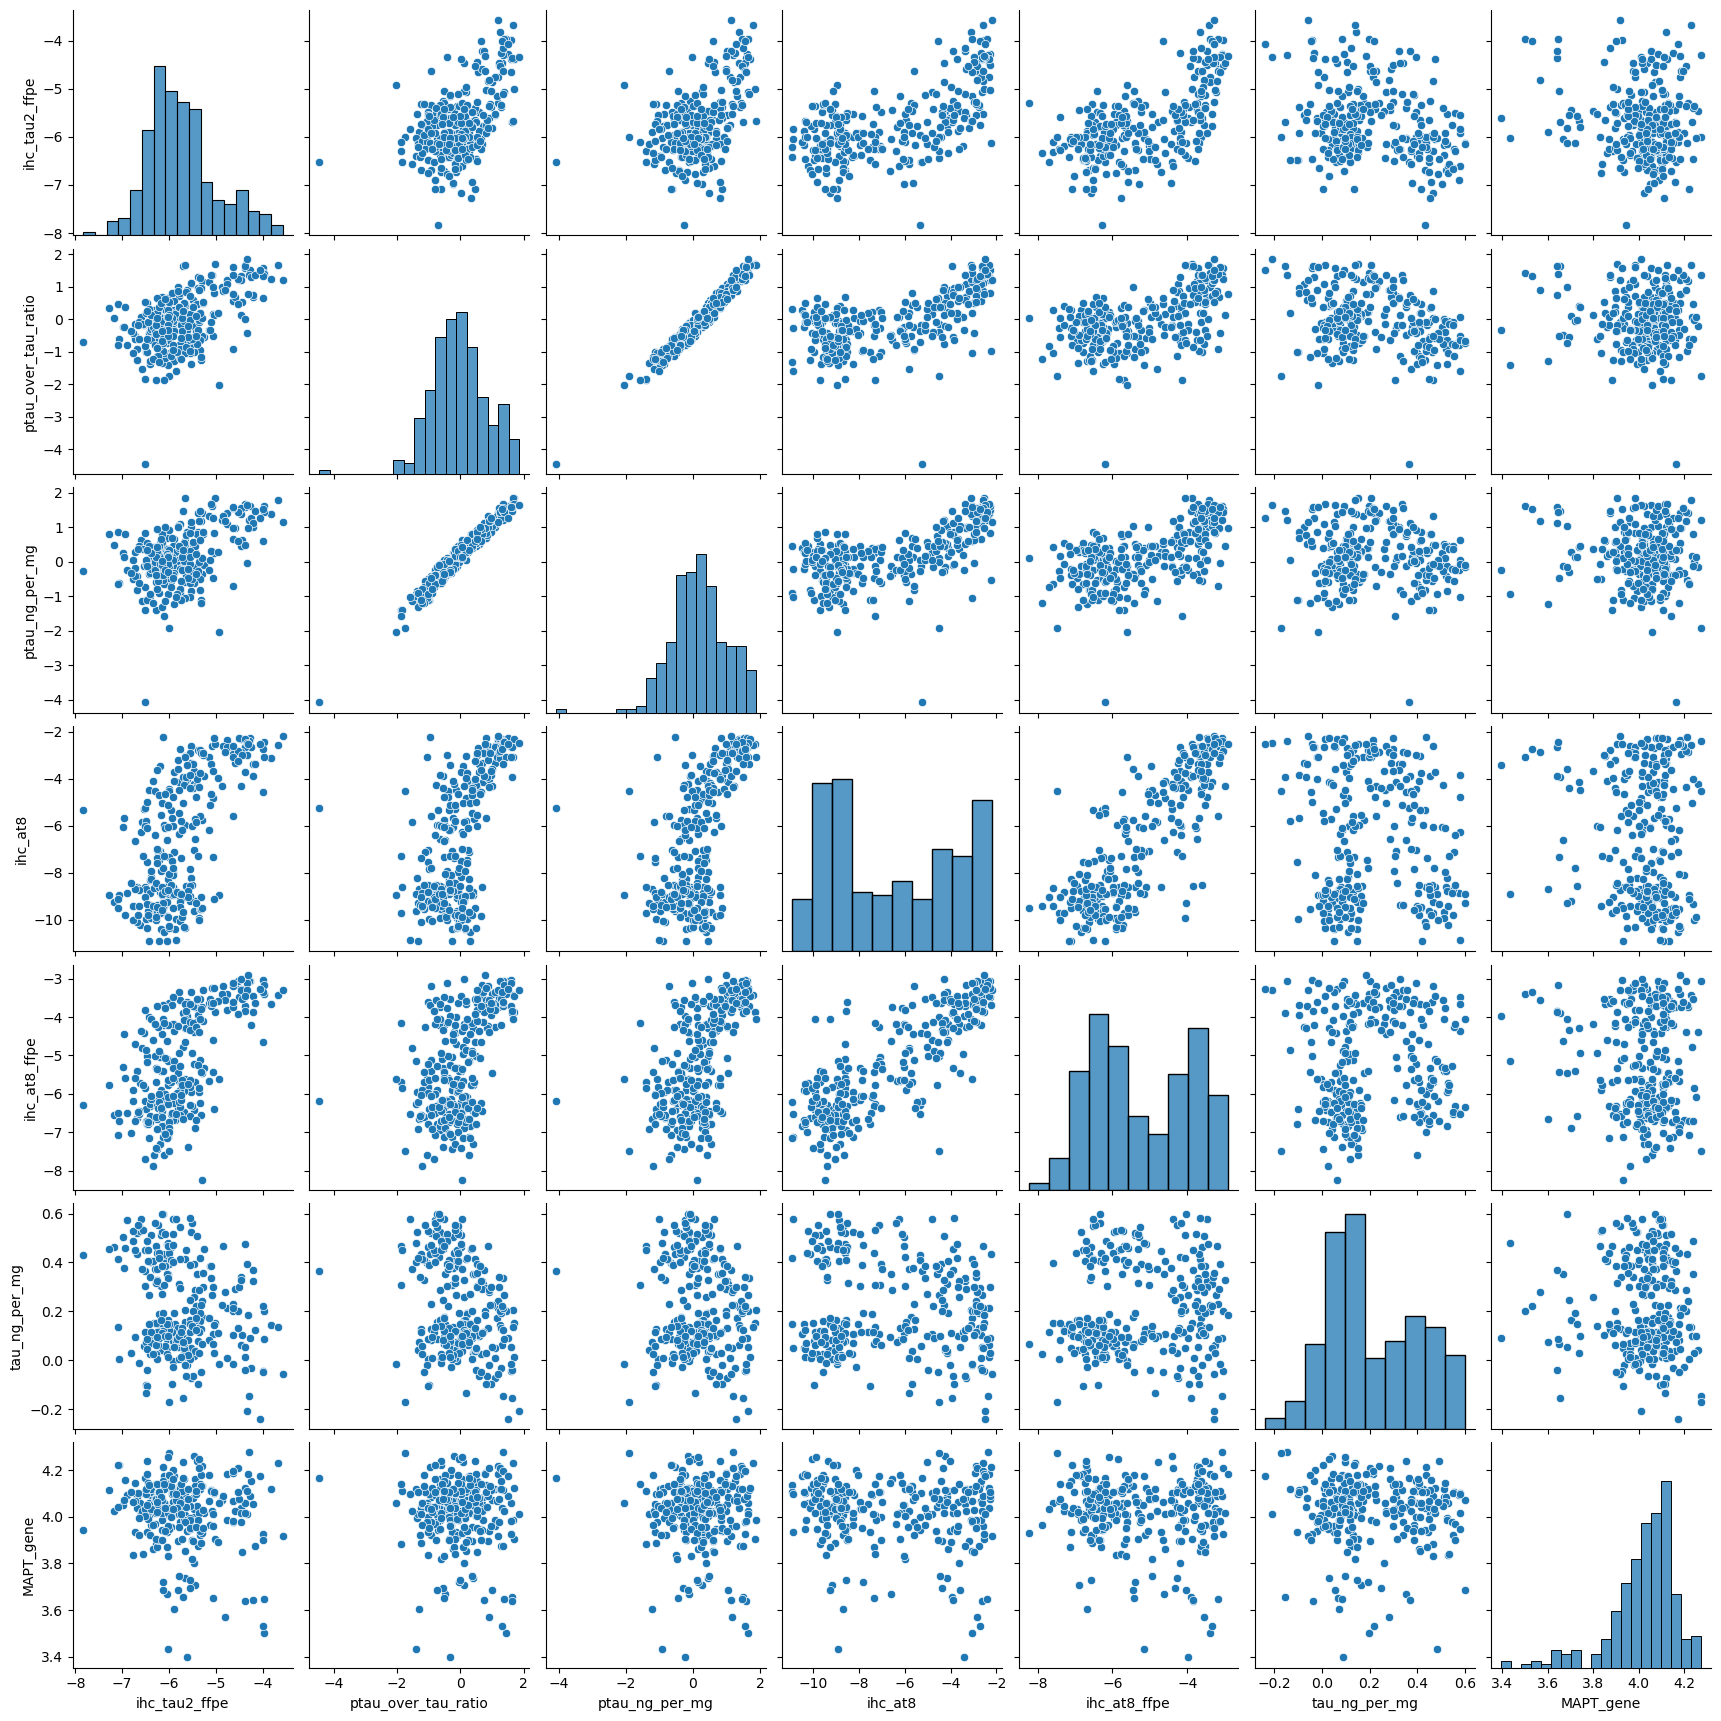

In [26]:
sns.pairplot(protein_gene_df[tau_features_gene])
plt.show()

/Users/tonylan/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


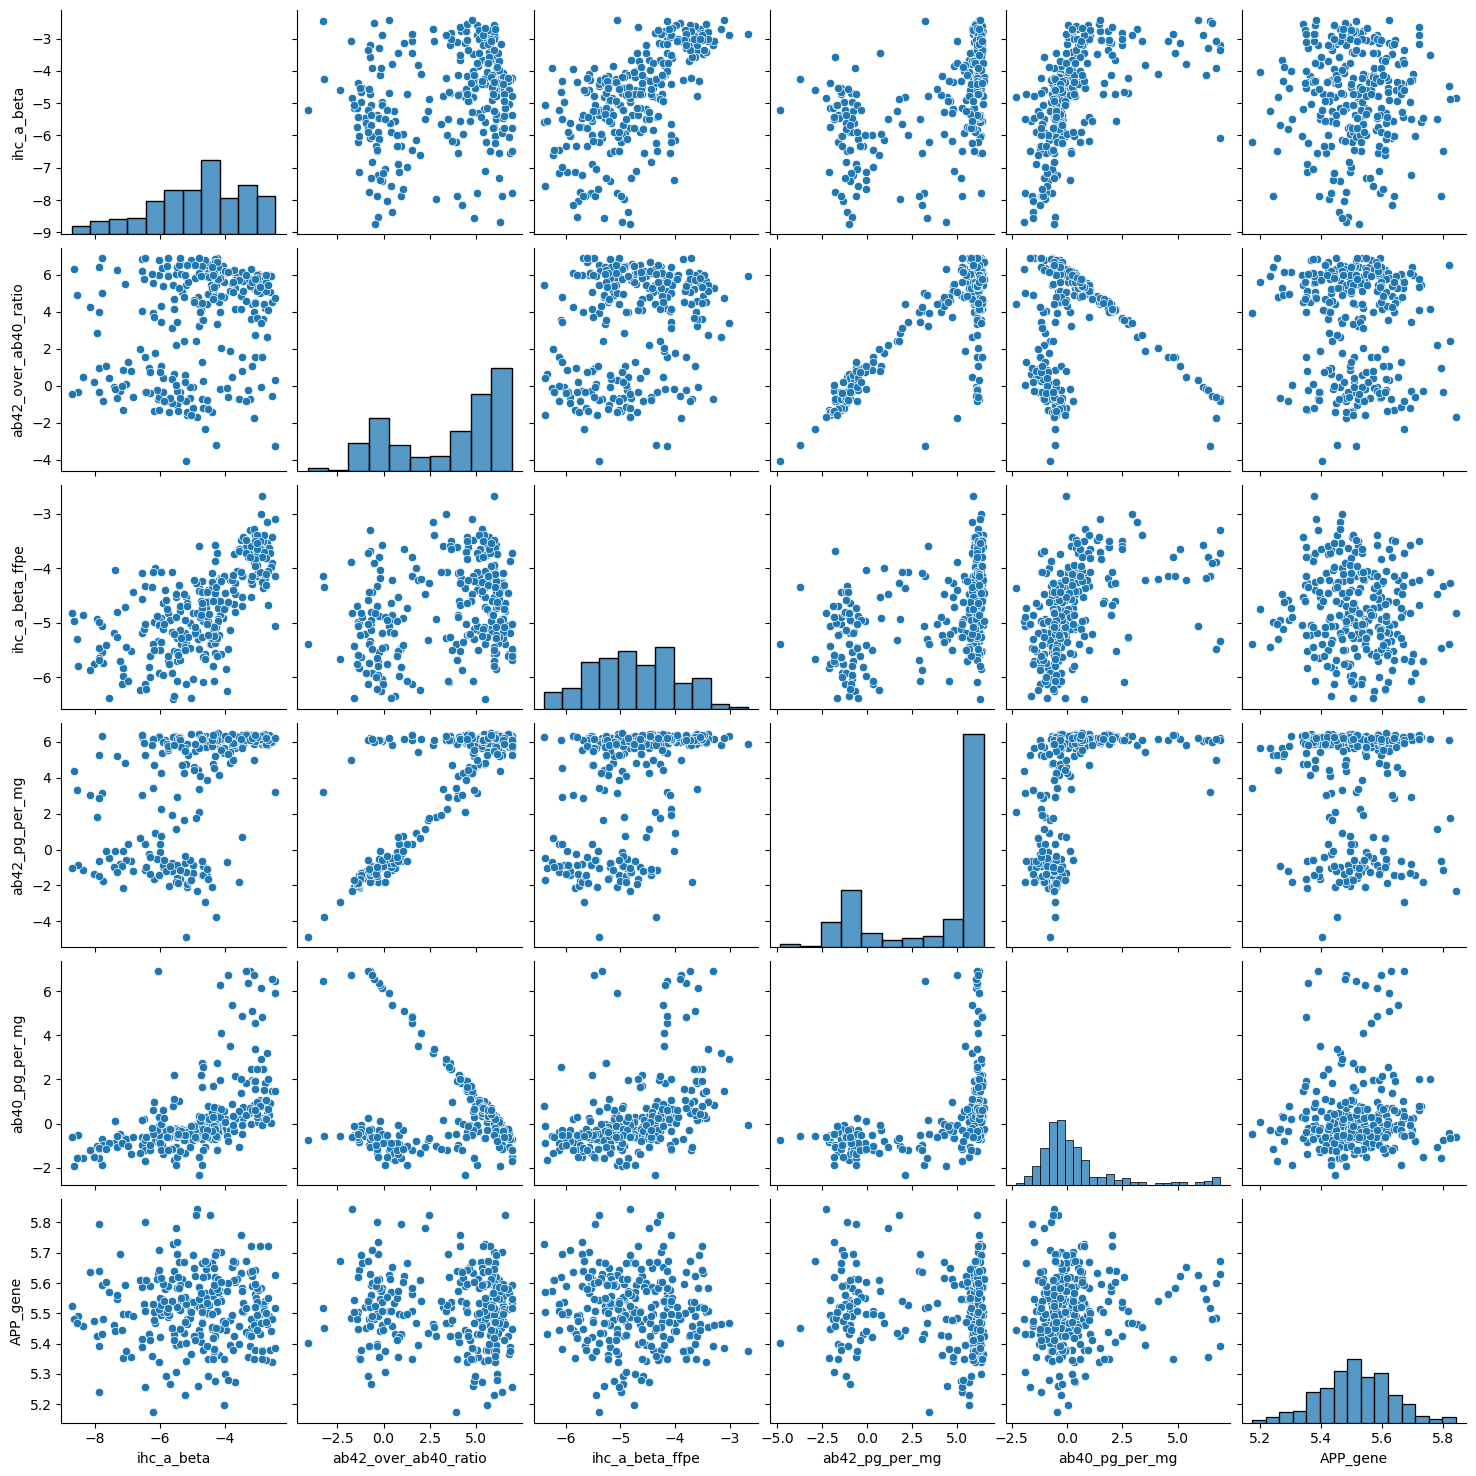

In [27]:
protein_gene_df[amyloid_features_gene] = np.log(protein_gene_df[amyloid_features_gene])
sns.pairplot(protein_gene_df[amyloid_features_gene])
plt.show()